A shapelet transform for time series classification (KDD 2012)
https://www.youtube.com/watch?v=RBSz2QkECaA

It also shows how we can write a better report

In [51]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [52]:
df = pd.read_csv('./data/trainingdata_2015-02-05.csv', parse_dates=True, index_col='date')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05 00:00:00,21.245,25.245,0.0,456.500000,0.003938,0
2015-02-05 00:01:00,21.245,25.245,0.0,458.500000,0.003938,0
2015-02-05 00:02:00,21.260,25.260,0.0,459.666667,0.003944,0
2015-02-05 00:03:00,21.245,25.245,0.0,464.000000,0.003938,0
2015-02-05 00:04:00,21.245,25.200,0.0,465.000000,0.003931,0


In [8]:
df.asfreq('T', method='ffill')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05 00:00:00,21.2450,25.2450,0.0,456.500000,0.003938,0
2015-02-05 00:01:00,21.2450,25.2450,0.0,458.500000,0.003938,0
2015-02-05 00:02:00,21.2600,25.2600,0.0,459.666667,0.003944,0
2015-02-05 00:03:00,21.2450,25.2450,0.0,464.000000,0.003938,0
2015-02-05 00:04:00,21.2450,25.2000,0.0,465.000000,0.003931,0
...,...,...,...,...,...,...
2015-02-05 23:55:00,20.2900,21.2900,0.0,439.500000,0.003127,0
2015-02-05 23:56:00,20.2225,21.2225,0.0,445.000000,0.003104,0
2015-02-05 23:57:00,20.2000,21.2000,0.0,442.500000,0.003097,0


In [13]:
df_hour = df.resample('10T').mean()

In [14]:
df_hour

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05 00:00:00,21.264500,25.219500,0.0,458.916667,0.003939,0.0
2015-02-05 00:10:00,21.290000,25.200000,0.0,458.566667,0.003942,0.0
2015-02-05 00:20:00,21.272000,25.209000,0.0,453.350000,0.003939,0.0
2015-02-05 00:30:00,21.193333,25.270667,0.0,452.600000,0.003930,0.0
2015-02-05 00:40:00,21.105000,25.435833,0.0,452.133333,0.003934,0.0
...,...,...,...,...,...,...
2015-02-05 23:10:00,20.437667,21.290000,0.0,446.333333,0.003156,0.0
2015-02-05 23:20:00,20.390000,21.290000,0.0,446.950000,0.003147,0.0
2015-02-05 23:30:00,20.348333,21.290000,0.0,443.100000,0.003139,0.0


In [15]:
df_hour.Occupancy.unique()

array([0. , 0.1, 0.8, 1. , 0.9, 0.6, 0.3, 0.2, 0.5])

# shapelet discovery

In [117]:
df.shape

(1440, 6)

In [118]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

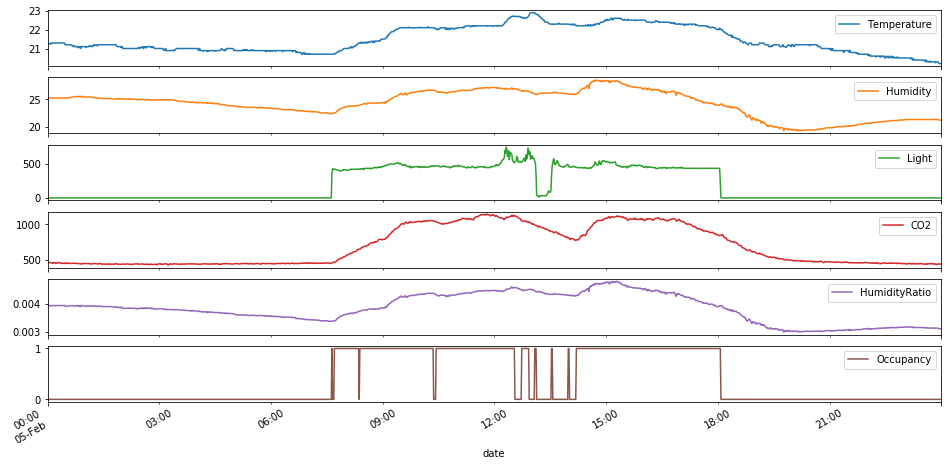

In [21]:
_ = df.plot(subplots= True, figsize=(16,8)) #added the dash to catch output 
                                            #values and only show fig

# shapelet discovery

In [88]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
import tensorflow as tf
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [92]:
# ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio','Occupancy']

class_name= "Occupancy"
attributes = ['Temperature'] #, 'Humidity', 'Light', 'CO2', 'HumidityRatio']

In [93]:
X = df[attributes].values
y = df[class_name].values

#X,y = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

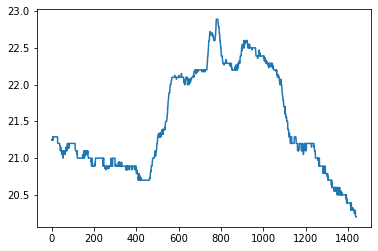

In [96]:
plt.plot(X)

In [23]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>


In [24]:
arrX = X
arry= y

In [124]:
arrX.shape

(1440, 2)

In [78]:
# arrX.reshape(-1,1)
# arry.reshape(-1,1)

In [114]:
# print(arrX)
print(arry.shape)

(8143,)


In [85]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 12
ts_sz 128
n_classes 3
shapelet_sizes {12: 3}


In [89]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [90]:
shp_clf.fit(arrX,arry)

ValueError: Negative dimension size caused by subtracting 12 from 5 for 'false_conv_0_0_3/convolution/Conv2D' (op: 'Conv2D') with input shapes: [?,1,5,1], [1,12,1,12].

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
predicted_labels = shp_clf.predict(arrX)
print("Correct classification rate:", accuracy_score(arry, predicted_labels))

1440/1440 [==============================] - 0s 46us/step
Correct classification rate: 0.6243055555555556


In [69]:
predicted_locations = shp_clf.locate(arrX)

1440/1440 [==============================] - 0s 48us/step


/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1440 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [80]:
n = shapelet_sizes.values()

In [82]:
for i in n:
    print(i)

3


In [84]:
shp_clf.shapelets_

AttributeError: 'LtsShapeletClassifier' object has no attribute 'shapelets_'

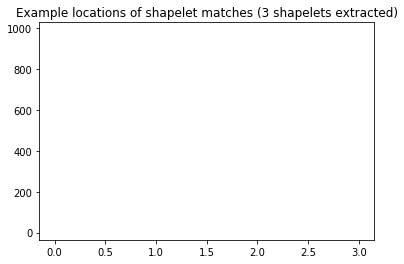

In [70]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "({} shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

# Shapelet Discovery 2

In [71]:
from shapelets_lts.classification import LtsShapeletClassifier

In [72]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=2,
    L_min=1,
    epocs=50,
    lamda=1,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)


In [73]:
shp_clf.fit(arrX, arry)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation


/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/shapelets_lts/network/soft_min_layer.py:67: RuntimeWarning: invalid value encountered in double_scalars
  M = M_numerator / self.psi


epoch=1/50 (iteration=1440) loss=nan validation accuracy=0.6256944444444444
epoch=2/50 (iteration=2880) loss=nan validation accuracy=0.6256944444444444
epoch=3/50 (iteration=4320) loss=nan validation accuracy=0.6256944444444444
epoch=4/50 (iteration=5760) loss=nan validation accuracy=0.6256944444444444
epoch=5/50 (iteration=7200) loss=nan validation accuracy=0.6256944444444444
epoch=6/50 (iteration=8640) loss=nan validation accuracy=0.6256944444444444
epoch=7/50 (iteration=10080) loss=nan validation accuracy=0.6256944444444444
epoch=8/50 (iteration=11520) loss=nan validation accuracy=0.6256944444444444
epoch=9/50 (iteration=12960) loss=nan validation accuracy=0.6256944444444444
epoch=10/50 (iteration=14400) loss=nan validation accuracy=0.6256944444444444
epoch=11/50 (iteration=15840) loss=nan validation accuracy=0.6256944444444444
epoch=12/50 (iteration=17280) loss=nan validation accuracy=0.6256944444444444
epoch=13/50 (iteration=18720) loss=nan validation accuracy=0.6256944444444444
e

LtsShapeletClassifier(K=10, L_min=1, R=2, alpha=-100, epocs=50, eta=0.01,
                      lamda=1, plot_loss=False,
                      shapelet_initialization='segments_centroids')

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred = shp_clf.predict(arrX)

print("Correct classification rate:", accuracy_score(arry, y_pred))

Correct classification rate: 0.6256944444444444


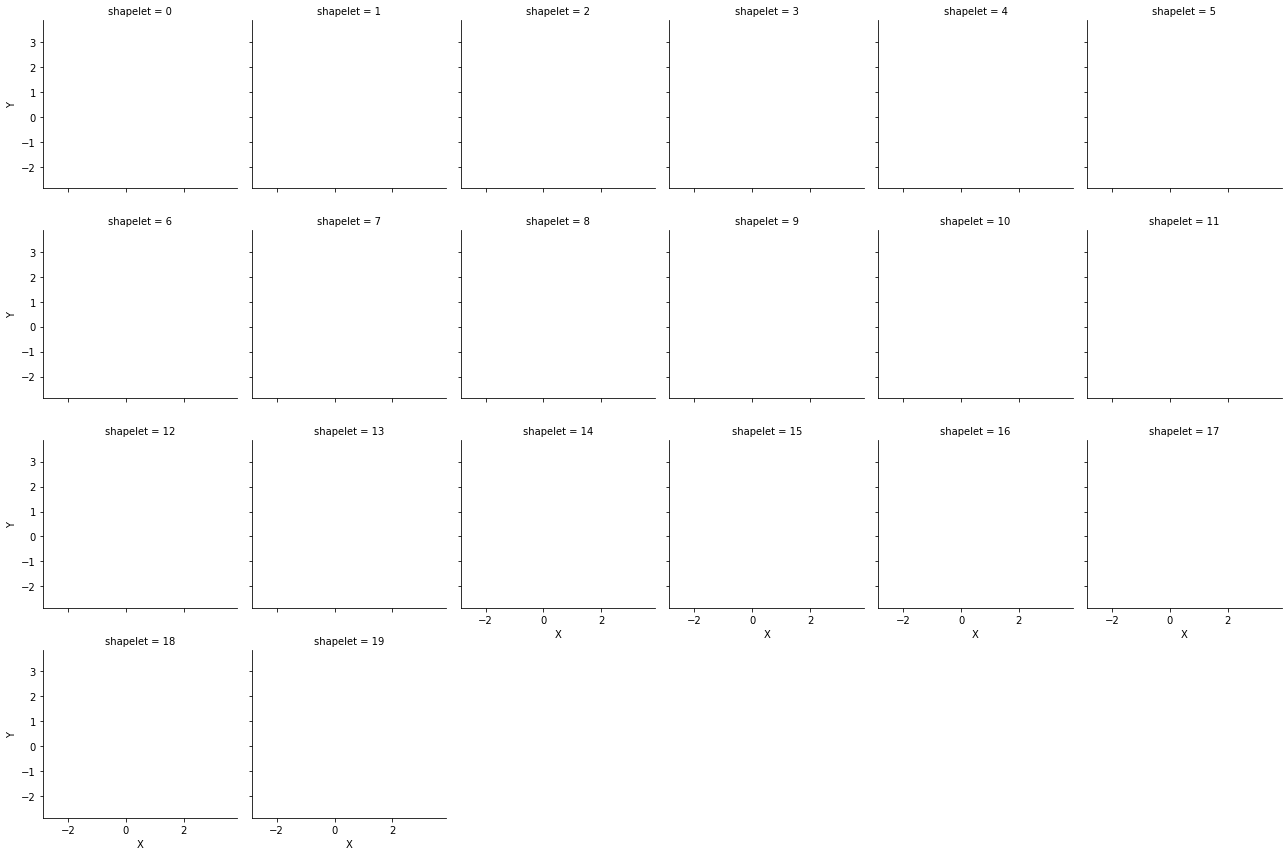

In [39]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [38]:
len(shapelets)

20

# Shapelet Discovery 3

In [40]:
from pyts.transformation import ShapeletTransform

In [50]:
st = ShapeletTransform(n_shapelets=8)
st.fit(X, y)

ShapeletTransform(criterion='mutual_info', n_jobs=None, n_shapelets=8,
                  random_state=None, remove_similar=True, sort=False, verbose=0,
                  window_sizes='auto', window_steps=None)

In [42]:
len(st.shapelets_)

3

In [153]:
st.shapelets_

array([array([490.  , 847.75]), array([509.        , 864.66666667]),
       array([545.33333333, 881.        ])], dtype=object)

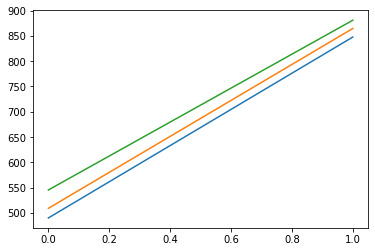

In [154]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

In [155]:
st.indices_

array([[550,   0,   2],
       [823,   0,   2],
       [821,   0,   2]])

In [156]:
st.scores_

array([0.55451682, 0.5556184 , 0.55807246])

# Shapelet Discovery 4

In [157]:
from pyts.classification import LearningShapelets

In [164]:
shp_clf = LearningShapelets(random_state=42)

In [161]:
shp_clf.fit(arrX, arry)

ValueError: 'shapelet_scale' and 'min_shapelet_length' must be such that shapelet_scale * min_shapelet_length is smaller than or equal to n_timestamps.

In [341]:
len(shp_clf.shapelets_[0])

3

In [165]:
from pyts.utils import windowed_view

In [166]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

AttributeError: 'LearningShapelets' object has no attribute 'shapelets_'

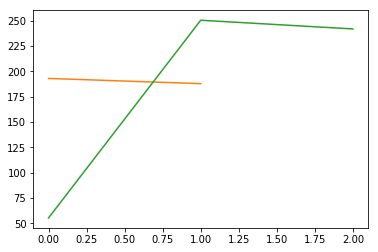

In [344]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [329]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[0]
X_window = windowed_view(arrX, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 1, axis=1).min(axis=1)

In [330]:
X_dist

array([[array([4.3333193]), array([198.4032816 , 203.55708683]),
        array([327.12827581, 131.81922267, 140.39510418])],
       [array([5.48848597]), array([197.1517816 , 202.30558683]),
        array([325.87827263, 130.56921949, 139.14510099])],
       [array([4.3143193]), array([195.81094827, 200.9647535 ]),
        array([324.54493797, 129.23588483, 137.81176634])],
       ...,
       [array([8.9143193]), array([229.42761494, 234.58142016]),
        array([355.21187669, 159.90282355, 168.47870506])],
       [array([8.9693193]), array([236.76039271, 241.91419794]),
        array([362.48966307, 167.18060993, 175.75649144])],
       [array([13.61598597]), array([241.6292816 , 246.78308683]),
        array([367.37854883, 172.06949569, 180.6453772 ])]], dtype=object)

In [331]:
np.mean(X_dist[y == 0], axis=0)

array([array([-129.99699459]), array([-11.95523861,  -6.80143339]),
       array([117.41017285, -77.89888028, -69.32299878])], dtype=object)

In [332]:
np.mean(X_dist[y == 1], axis=0)

array([array([15.07447843]), array([315.13163881, 320.28544404]),
       array([443.89784109, 248.58878795, 257.16466946])], dtype=object)